# SVR
- resource: 
  - [Medium Article](https://medium.com/@sametgirgin/support-vector-regression-in-6-steps-with-python-c4569acd062d)
  - [Analytics Vidhya Article](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)
  - [Kaggle notebook](https://www.kaggle.com/code/amansharmaog/4-support-vector-regression)
  - works in high dimensional spaces, maximize margin, min error.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Position_Salaries.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
x = df.iloc[:, 1:-1].values #all except last col(labels)
y = df.iloc[:, -1].values #select last col
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [11]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [18]:
regressor = SVR(kernel='rbf')
regressor.fit(x,y.ravel())

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[12.5]])).reshape(-1,1))
#error of shapemismatch, addes reshape(-1,1)

array([[411842.2125027]])

Text(0, 0.5, 'salary')

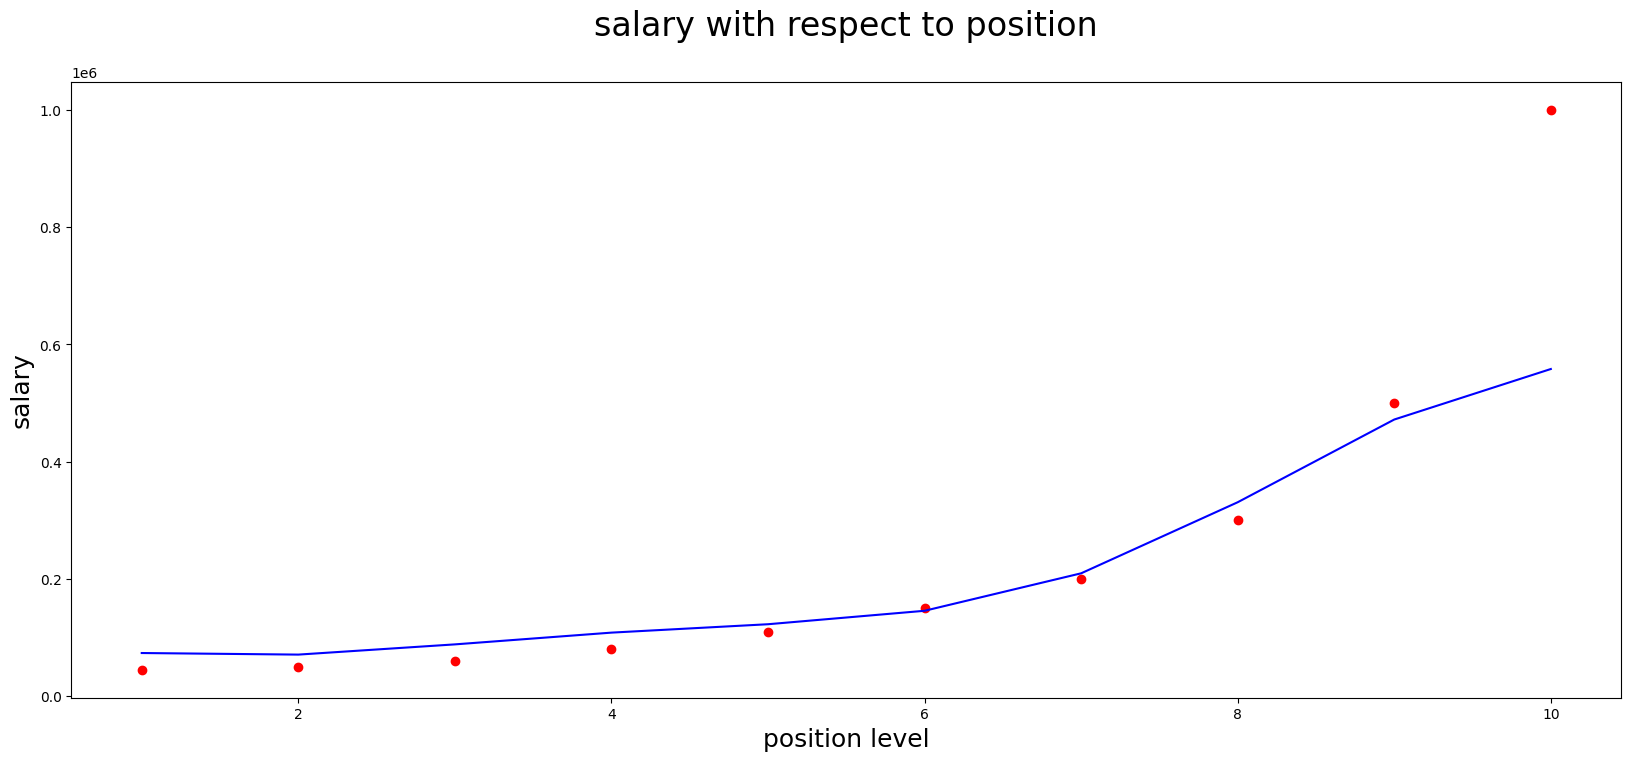

In [24]:
plt.figure(figsize=(20,8))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x).reshape(-1,1), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color='blue')
plt.title('salary with respect to position\n' , size=24)
plt.xlabel('position level', size=18)
plt.ylabel('salary', size=18)